# Исследование объявлений о продаже квартир

В нашем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. А также картографические данные и расстояние до центра, аэропорта, ближайшего парка и водоёма. 
Необходимо проанализировать и подготовить данные для прогнозирования рыночной стоимости недвижимости.

## Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('datasets/real_estate_data.csv', sep='\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Довольно много столбцов, и многие имеют пропущенные значения

In [4]:
df.columns.str.lower()

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'citycenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Переименуем булевы столбцы, используюя приставку "is"

In [5]:
df.columns = ['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition']

In [6]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Замечаем вещественный тип для некоторых целочисленных данных.

In [7]:
df['locality_name'].value_counts()

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

Надо проверить, есть ли совпадения названий для **посёлков** и **поселков**

In [8]:
df['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [9]:
df['balcony'].isnull().sum()

11519

In [10]:
df = df.drop('total_images', 1)

### Вывод

В нашем распоряжении таблица данных, где в каждой строке сожержится информация об объекте недвижимости, выставлявшемся на продажу, его характеристиках, стоимости и количестве времени, до снятия объекта с продажи.

Всего строк в таблице: 23699

Некоторые столбцы имеют тип не соответствующий данным.

1. *first_day_exposition* нужно преобразовать в тип datetime
2. *is_apartment* хорошо бы преобразовать в тип bool
3. Явно целочисленные данные можно преобразовать к типу int: *last_price*, *floors_total*, *balcony*, *parks_around3000*, *ponds_around3000*, *days_exposition*

Требуется заменить в столбце *locality_name* написание слова *посёлок* на единообразное, возможо, есть повторы

Треть данных столбца количества балконов - пустые значения. Можно смело предположить, что поле не заполнялось, если балконов нету. Это поле можно заполнить нулевым значением.



## Шаг 2. Предобработка данных

### Пропущенные значения

***Потолки***

In [11]:
df['ceiling_height'].isnull().sum()

9195

In [12]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [13]:
df['ceiling_height'] = df['ceiling_height'].fillna(2.65)

<AxesSubplot:>

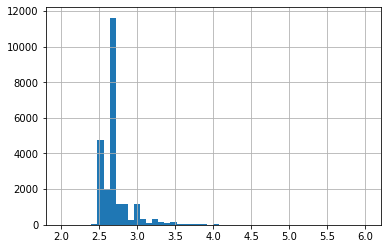

In [14]:
df['ceiling_height'].hist(bins=50, range=(2, 6))

In [15]:
df[df['ceiling_height'] > 6]['ceiling_height'].count()

29

In [16]:
df[df['ceiling_height'] > 6].head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,False,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,False,False,...,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4643,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,False,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0


Обнаружили 29 квартир с потолками выше 6 метров, большинство которых находится в многоэтажках. Может, это пентхаусы?

In [17]:
df[df['ceiling_height'] > 10]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,False,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,False,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,False,...,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,False,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,NaN,False,...,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,False,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,3300000.0,44.4,2019-03-25T00:00:00,2,25.0,5.0,31.3,5,NaN,False,...,5.7,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,3950000.0,42.0,2017-03-26T00:00:00,3,25.0,5.0,30.0,2,NaN,False,...,5.2,NaN,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


Квартиры с потолками до 20 метров находятся в основном на последних этажах. Можно предположить, что это действительно пентхаусы. Для двузначных значений больше 20 больше похоже на то, что при вводе, ошиблись с размерностью. Поделим их на 10, что будет походить на правду. Возможны потолки 5-10 метров.

In [18]:
df.loc[df['ceiling_height']>20, 'ceiling_height'] /= 10

In [19]:
df[df['ceiling_height'] > 20]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [20]:
df['ceiling_height'].describe()


count    23699.000000
mean         2.699480
std          0.276991
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         20.000000
Name: ceiling_height, dtype: float64

***Этажность***

In [21]:
df['floors_total'].isnull().sum()

86

<AxesSubplot:>

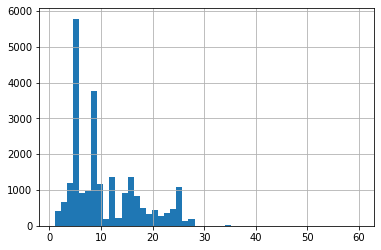

In [22]:
df['floors_total'].hist(bins=50)

<AxesSubplot:>

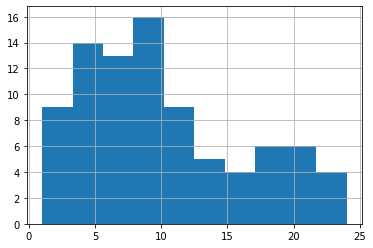

In [23]:
df[df['floors_total'].isnull()==True]['floor'].hist()

Есть несколько пиков в этажности. Определённого среднего значения нет. Квартиры, с неуказанной этажностью дома находятся на разных этажах многоэтажек. Так как, возможно, этажность и фактический этаж квартиры влияют на стоимость, то оставим это поле незаполненным, чтобы не вносить искажающие картину данные. 

***Жилая площадь***

In [24]:
df['living_area'].isnull().sum()

1903

In [25]:
df[(df['living_area'].isnull()==True) & (df['kitchen_area'].isnull()==False)][['living_area', 'total_area', 'kitchen_area', 'rooms', 'is_apartment', 'is_studio', 'is_open_plan']]

,living_area,total_area,kitchen_area,rooms,is_apartment,is_studio,is_open_plan
7,NaN,71.60,18.90,2,NaN,False,False
116,NaN,97.20,18.30,3,NaN,False,False
165,NaN,60.20,10.20,2,NaN,False,False
238,NaN,43.40,12.40,1,NaN,False,False
360,NaN,57.84,10.19,2,NaN,False,False
...,...,...,...,...,...,...,...
23534,NaN,39.00,10.00,1,False,False,False
23584,NaN,66.00,8.00,3,NaN,False,False
23587,NaN,88.00,14.00,3,NaN,False,False
23588,NaN,69.00,10.00,2,NaN,False,False


Мы имеем менее 10% строк с пустыми данными жилой площади. Это не много. Данные пропущены вероятно по причине отсутствия этого параметра в подтверждающих документах, также возможно, это квартиры со свободной планировкой.

***Балконы***

Можно смело предположить, что поле не заполнялось, если балконов нету. Установим вместо пропущенных значений нули

In [26]:
df['balcony'] = df['balcony'].fillna(0)

In [27]:
df['balcony'].isnull().sum()

0

***Срок размещения***

In [28]:
df['days_exposition'].isnull().sum()

3181

<AxesSubplot:>

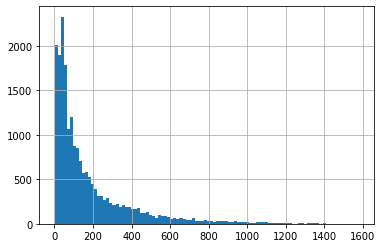

In [29]:
df['days_exposition'].hist(bins=100)

13% пропущенных, это существенное количество. Вероятная причина - это то, что объявление не было снято на момент формирования выборки, квартира не была продана. Мы не можем приблизительно расчитать, как долго могла продаваться каждая из этих квартир до проведения исследования. Это одна из целей. Оставим поле пустым. 

In [30]:
df[df['days_exposition'].isnull()==True]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,NaN,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,5350000.0,40.00,2018-11-18T00:00:00,1,2.65,22.0,NaN,3,NaN,False,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,5200000.0,50.60,2018-12-02T00:00:00,2,2.65,9.0,30.3,7,NaN,False,...,7.00,0.0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,6600000.0,52.10,2019-01-31T00:00:00,2,2.60,24.0,29.7,9,NaN,False,...,8.30,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,NaN,False,...,15.60,0.0,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,NaN,False,...,5.60,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23694,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23696,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,NaN,False,...,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***Название населённого пункта***

In [31]:
df['locality_name'].isnull().sum()

49

В таблице есть 49 не заполненных населённых пунктов, это меньше 1% всех записей. Удалим их, так как нет других данных явно указывающих на населённый пункт, и заполнить их мы не сможем. Исследование в дальнейшем касается конкретных населённых пунктов. Соответственно эти данные совершенно были бы бесполезны.

In [32]:
df['locality_name'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: locality_name, Length: 23699, dtype: bool

In [33]:
df = df.dropna(subset=['locality_name'])

In [34]:
df['locality_name'].isnull().sum()

0

In [35]:
df['locality_name'].duplicated().sum()

23286

In [36]:
len(df['locality_name'].unique())

364

In [37]:
df['locality_name'] = df['locality_name'].str.replace('поселок', 'посёлок')

In [38]:
len(df['locality_name'].unique())

330

Поправили названия 34 посёлков без буквы "ё", чтобы не задваивались

***Цена***

In [39]:
df['last_price'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [40]:
len(df[df['last_price']>500000000])

1

In [41]:
df[df['last_price']>500000000]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,763000000.0,400.0,2017-09-30T00:00:00,7,2.65,10.0,250.0,10,NaN,False,...,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0


Самый дорогой пентхаус

<AxesSubplot:>

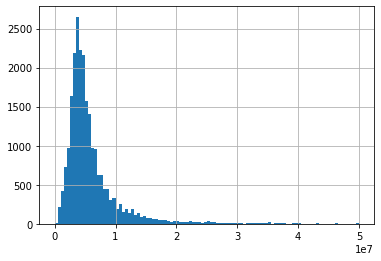

In [42]:
df['last_price'].hist(bins=100, range=(0, 50000000))

<AxesSubplot:>

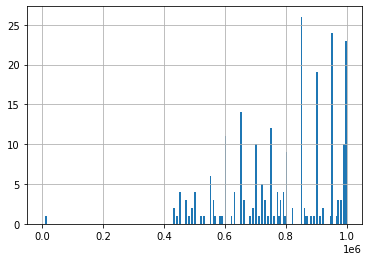

In [43]:
df['last_price'].hist(bins=200, range=(0, 1000000))

Мы нашли квартиры практически даром. Посмотрим, что есть в диапазоне до полумиллиона.

In [44]:
df.query('(last_price < 500000)')[['last_price', 'total_area', 'rooms', 'locality_name', 'city_centers_nearest']].sort_values('last_price')

,last_price,total_area,rooms,locality_name,city_centers_nearest
8793,12190.0,109.0,2,Санкт-Петербург,9176.0
14911,430000.0,54.0,2,посёлок станции Свирь,NaN
17456,430000.0,30.4,1,Сланцы,NaN
16274,440000.0,40.0,1,деревня Старополье,NaN
5698,450000.0,42.0,2,городской посёлок Будогощь,NaN
9581,450000.0,43.4,2,деревня Старополье,NaN
16219,450000.0,38.5,2,деревня Вахнова Кара,NaN
17676,450000.0,36.5,1,деревня Ям-Тесово,NaN
18867,470000.0,41.0,1,деревня Выскатка,NaN
21912,470000.0,37.0,1,посёлок Совхозный,NaN


Действительно, есть одна подозрительно дешёвая квартира в СПб и ряд квартир в посёлках.

In [45]:
len(df.query('(last_price < 1000000) & (locality_name=="Санкт-Петербург")'))

1

В Петербурге других "бросовых" квартир, кроме одной, не обнаружено. Возможно, забыли несколько нолей дописать. Но, не будем гадать, удалим же её.

In [46]:
df = df.drop(index=8793)

In [47]:
len(df.query('(last_price < 1000000) & (locality_name=="Санкт-Петербург")'))

0

***Кухни***

In [48]:
df['kitchen_area'].isnull().sum()

2269

In [49]:
df.query('locality_name=="Санкт-Петербург" and floors_total==22 and total_area==40')['kitchen_area'].median()

12.1

Вариант заполнения пустых значений: по медиане площади кухни в квартирах с такой же площадью и в доме с такой же этажностью. Но это не очень точно, также не учитывает перепланировки и различные серии домов в разных городах. 

In [50]:
df[df['kitchen_area'].isnull() ==True]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,2200000.0,32.8,2018-02-19T00:00:00,1,2.65,9.0,NaN,2,NaN,False,...,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,False,...,NaN,0.0,посёлок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22.0,NaN,3,NaN,False,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,6300000.0,46.5,2017-03-06T00:00:00,1,2.65,13.0,NaN,13,NaN,False,...,NaN,0.0,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,2414306.0,40.5,2016-09-08T00:00:00,1,2.56,18.0,19.6,10,False,False,...,NaN,0.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0
23663,6400000.0,88.0,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,NaN,False,...,NaN,0.0,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,2450000.0,45.6,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,NaN,False,...,NaN,0.0,посёлок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,2500000.0,35.0,2017-12-08T00:00:00,1,2.65,9.0,NaN,4,NaN,False,...,NaN,0.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


***Комнаты***

<AxesSubplot:>

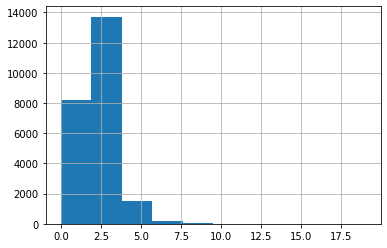

In [51]:
df['rooms'].hist()

In [52]:
df[df['rooms']==0][['rooms', 'total_area', 'living_area', 'floors_total', 'floor', 'balcony', 'is_apartment', 'is_studio', 'is_open_plan']].sort_values('total_area')

,rooms,total_area,living_area,floors_total,floor,balcony,is_apartment,is_studio,is_open_plan
8886,0,15.5,10.0,5.0,2,0.0,NaN,True,False
9412,0,16.0,13.0,6.0,1,0.0,NaN,False,True
716,0,17.0,12.0,9.0,1,0.0,NaN,True,False
12996,0,18.0,16.0,5.0,3,0.0,NaN,True,False
8755,0,18.8,15.8,19.0,1,0.0,NaN,True,False
...,...,...,...,...,...,...,...,...,...
13613,0,58.4,33.0,7.0,6,0.0,NaN,True,False
21227,0,71.0,68.0,5.0,5,0.0,NaN,True,False
3458,0,73.6,50.0,3.0,1,0.0,NaN,True,False
20082,0,98.4,60.5,5.0,2,0.0,NaN,True,False


Довольно странно видеть квартиры без комнат. Но, оказалось, это либо студии, либо квартиры со свободной планировкой.

***Расположение***

In [53]:
df['parks_around3000'].value_counts()

0.0    10080
1.0     5670
2.0     1744
3.0      645
Name: parks_around3000, dtype: int64

Выбросов нет

In [54]:
df['ponds_around3000'].value_counts()

0.0    9054
1.0    5702
2.0    1889
3.0    1494
Name: ponds_around3000, dtype: int64

Выбросов нет

<AxesSubplot:>

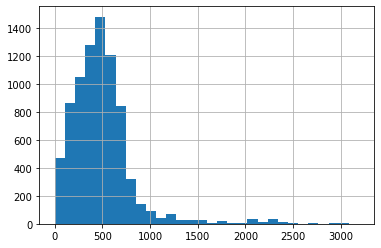

In [55]:
df['parks_nearest'].hist(bins=30)

Аномалий нет

<AxesSubplot:>

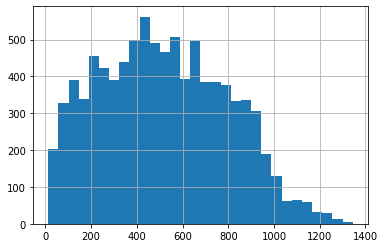

In [56]:
df['ponds_nearest'].hist(bins=30)

Аномалий нет

<AxesSubplot:>

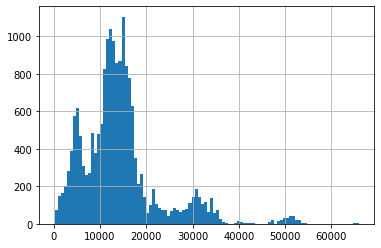

In [57]:
df['city_centers_nearest'].hist(bins=100)

Не вполне понятно, до какого города расчитывается расстояние. Может быть, Санкт-Петербург. 🤔

In [58]:
df[df['city_centers_nearest'].isna()==False].groupby('locality_name')[['city_centers_nearest', 'airports_nearest']].mean().sort_values('city_centers_nearest')

,city_centers_nearest,airports_nearest
locality_name,,
Санкт-Петербург,11601.446453,28045.650592
посёлок Парголово,19924.776758,53994.926606
посёлок Мурино,21888.000000,51553.000000
посёлок Стрельна,23376.113636,28148.363636
посёлок Шушары,24243.387615,16061.458716
посёлок Левашово,25727.000000,52693.000000
посёлок Песочный,26475.250000,54565.500000
посёлок Петро-Славянка,27165.000000,20605.000000
посёлок Александровская,27468.000000,12896.500000


Рассмотрим остальные пропуски

In [59]:
df.isnull().sum()

last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area              1898
floor                       0
is_apartment            20889
is_studio                   0
is_open_plan                0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14564
days_exposition          3180
dtype: int64

In [60]:
df[df['floors_total'].isna()==True].head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,False,...,12.00,0.0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,False,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,False,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,False,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,False,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


Обычные квартиры в многоэтажках, или небоскрёбах, или в таунхаусах, не понятно.

In [61]:
df['last_price'].corr(df['living_area'])

0.5665186333371395

In [62]:
df['last_price'].corr(df['kitchen_area'])

0.5207110890411635

Есть небольшая зависимость стоимости квартиры от жилой площади и площади кухни

**Этажность** - важный параметр, который участвует в исследовании. Параметр в нашем случае не вычисляемый, и косвенно зависящий от этажа расположения квартиры. Записей меньше 1%.  Оставим его незаполненным, т. о. они не повлияют на результаты, где нам важна этажность.

То же самое можно сказать про **жилую площадь** и **зону кухни**. Так как эти параметры умозрительно зависят от других характеристик (количество комнат, типа квартиры, типа дома, по которым собираемся вести исследование), то мы не можем здесь заполнить их даже средними, так как это может исказить узкие срезы данных. Пустых значений жилой площади и кухни 9% и 10%. Это существенно, чтобы заполнять их неподтверждёнными данными. Оставим пустыми


In [63]:
df[df['is_apartment'].isna()==True]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.0,4,NaN,False,...,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,NaN,False,...,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


**Апартаменты** в основном не заполнен. Опыт показывает, что такие признаки устанавливаются галочкой. Далее при обработке в базу данных попадает либо True, либо всё остальное (False или null). Анализ данных в открытых источниках показал, что процент апартаментов в Питере лишь не более 5% от всех квартир. Поэтому всё указывает на то, что смело можно поставить False во все пропуски.

In [64]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [65]:
df['is_apartment'].isna().sum()

0

In [66]:
df[df['airports_nearest'].isna()==True].head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.00,5,False,False,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,False,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,NaN,2,False,False,...,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0


**Растояния до ближайших объектов**, если это небольшие населённые пункты, можно вполне заполнить средними значениями. И также можем указать медианное значение парков и водоёмов, очевидно, что в небольших посёлках всё поблизости. Попробуем это сделать. Если среди оставшихся строк, есть информация для этого.


Составим таблицу со средними для расстояний и медианными значениями для количественных

In [67]:
df_geo = df[df['locality_name']!="Санкт-Петербург"].groupby('locality_name').agg({
    'city_centers_nearest': 'mean', 
    'airports_nearest': 'mean',
    'parks_nearest': 'mean', 
    'ponds_nearest':'mean',
    'parks_around3000': 'median', 
    'ponds_around3000': 'median'
}).dropna(how='all')

In [68]:
df_geo

,city_centers_nearest,airports_nearest,parks_nearest,ponds_nearest,parks_around3000,ponds_around3000
locality_name,,,,,,
Зеленогорск,54617.583333,73300.250000,210.625000,485.888889,3.0,1.0
Колпино,32113.771513,26375.863501,495.481203,532.268421,0.0,1.0
Красное Село,30020.284091,26595.579545,466.086957,445.500000,0.0,0.0
Кронштадт,49195.726316,67469.263158,324.574713,343.413793,2.0,2.0
Ломоносов,50739.969697,48308.280303,389.062500,550.048193,0.0,1.0
Павловск,33206.921053,21053.342105,379.538462,493.382353,2.0,2.0
Петергоф,35468.925373,40184.676617,419.559441,513.367521,1.0,1.0
Пушкин,28745.375000,16447.869919,404.297170,482.988701,1.0,0.0
Сестрорецк,34624.480874,56640.486339,409.583333,397.977778,0.0,1.0


Пробежим по этому короткому списку и проставим эти значения вместо пустых в нашей основной таблице

In [69]:
for index, df_geo_row in df_geo.iterrows():
       locality_name = index
       for row_name in ['city_centers_nearest', 'airports_nearest', 'parks_nearest', 'ponds_nearest', 'parks_around3000', 'ponds_around3000']:
              row_value = df_geo_row[row_name]
              df[row_name] = df[row_name].where(
               (df['locality_name'] != locality_name) | (df[row_name].isna() != True), row_value)

In [70]:
df.isnull().sum()

last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area              1898
floor                       0
is_apartment                0
is_studio                   0
is_open_plan                0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         4949
city_centers_nearest     4925
parks_around3000         4925
parks_nearest           14435
ponds_around3000         4925
ponds_nearest           12709
days_exposition          3180
dtype: int64

Удалось немного уменьшить непределённость в географии для порядка 1500 записей.
Если ограничиваться только имеющейся в таблице информацией, то для остальных посёлков у нас нет данных. 
Заполнять средними по Лен. области странно, да и аэропорт с центром в разных местах, нарушится связь, на севере ближе центр, на юге ближе аэропорт.

In [71]:
df[df['parks_nearest'].isna()==True]['parks_around3000'].value_counts()

0.0    9510
Name: parks_around3000, dtype: int64

In [72]:
df[df['ponds_nearest'].isna()==True]['ponds_around3000'].value_counts()

0.0    7784
Name: ponds_around3000, dtype: int64

Что касается большого числа пустых значений в полях **расстояния до ближайшего парка и водоёма**, то пустые значения как раз сигнализируют, что парков рядом нету.


### Типы данных

In [73]:
df['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

Так как время в поле не указано, округлим до дня и преобразуем в тип дата

In [74]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

In [75]:
df['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

In [76]:
df['balcony'] = df['balcony'].astype('int')

Преобразуем в целочисленный тип стоимость квартиры

In [77]:
df['last_price'] = df['last_price'].astype('int')

Преобразуем в целочисленный тип остальные столбцы с сохранением нулевых значений и округлением до целого. Данные столбцы не подразумевают, либо не требуют дробной точности.

In [78]:
for column in df[['floors_total', 'parks_around3000', 'ponds_around3000', 
                    'airports_nearest', 'city_centers_nearest', 'parks_nearest', 'ponds_nearest',
                   'days_exposition']]:
    df[column] = df[column].round(0)

for column in df[['floors_total', 'parks_around3000', 'ponds_around3000', 
                    'airports_nearest', 'city_centers_nearest', 'parks_nearest', 'ponds_nearest',
                   ]]:
    df[column] = df[column].astype('Int64')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23649 entries, 0 to 23698
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            23649 non-null  int32         
 1   total_area            23649 non-null  float64       
 2   first_day_exposition  23649 non-null  datetime64[ns]
 3   rooms                 23649 non-null  int64         
 4   ceiling_height        23649 non-null  float64       
 5   floors_total          23564 non-null  Int64         
 6   living_area           21751 non-null  float64       
 7   floor                 23649 non-null  int64         
 8   is_apartment          23649 non-null  bool          
 9   is_studio             23649 non-null  bool          
 10  is_open_plan          23649 non-null  bool          
 11  kitchen_area          21380 non-null  float64       
 12  balcony               23649 non-null  int32         
 13  locality_name   

In [80]:
df.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,...,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN
1,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,...,11.0,2,посёлок Шушары,12817,18603,0,<NA>,0,573,81.0
2,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,...,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558.0
3,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,...,NaN,0,Санкт-Петербург,28098,6800,2,84,3,234,424.0
4,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,...,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121.0


## Шаг 3. Посчитайте и добавьте в таблицу

### Расчёт цены квадратного метра

In [81]:
df['price_millions'] = df['last_price'] / 1000000

In [82]:
df['price_millions'] = df['price_millions'].round(2)

Округлим цену до миллионов, с двумя знаками после запятой, для удобства отображения

In [83]:
df['m2_price'] = df['last_price'] / df['total_area']

In [84]:
df['m2_price'] = df['m2_price'].round(-3).astype('int')

Округлим до тысяч и приведём к целочисленному. В наших расчётах шкалы будут иметь значительный размах в десятках милиионов, лишняя точность нам не нужна.

In [85]:
df.sort_values(by='m2_price', ascending=False ).head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_millions,m2_price
12971,763000000,400.0,2017-09-30,7,2.65,10,250.0,10,False,False,...,Санкт-Петербург,25108,3956,1,530,3,756,33.0,763.00,1908000
1436,330000000,190.0,2018-04-04,3,3.50,7,95.0,5,False,False,...,Санкт-Петербург,23011,1197,3,519,3,285,233.0,330.00,1737000
22831,289238400,187.5,2019-03-19,2,3.37,6,63.7,6,False,False,...,Санкт-Петербург,22494,1073,3,386,3,188,NaN,289.24,1543000
14706,401300000,401.0,2016-02-20,5,2.65,9,204.0,9,False,False,...,Санкт-Петербург,21912,2389,1,545,1,478,393.0,401.30,1001000
4996,124000000,124.5,2017-10-12,4,3.00,4,67.2,2,False,False,...,Санкт-Петербург,20399,1722,3,302,3,172,45.0,124.00,996000


### День недели, месяц и год публикации объявления

In [86]:
weekdays = {0: '1 - понедельник', 1: '2 - вторник', 2: '3 - среда', 3: '4 - четверг', 4: '5 - пятница', 5: '6 - суббота', 6: '7 - воскресенье'}

In [87]:
df['exposition_weekday'] = df['first_day_exposition'].dt.dayofweek.apply(lambda x: weekdays[x])

In [88]:
months = {1: '01 - январь', 2: '02 - февраль', 3: '03 -март', 4: '04 - апрель', 5: '05 - май', 6: '06 - июнь', 
          7: '07 - июль', 8: '08 - август', 9: '09 - сентябрь', 10: '10 - октябрь', 11: '11 - ноябрь', 12: '12 - декабрь'}

In [89]:
df['exposition_month'] = df['first_day_exposition'].dt.month.apply(lambda x: months[x])

In [90]:
df['exposition_year'] = df['first_day_exposition'].dt.year

In [91]:
df[['first_day_exposition', 'exposition_year', 'exposition_month', 'exposition_weekday']].head()

,first_day_exposition,exposition_year,exposition_month,exposition_weekday
0,2019-03-07,2019,03 -март,4 - четверг
1,2018-12-04,2018,12 - декабрь,2 - вторник
2,2015-08-20,2015,08 - август,4 - четверг
3,2015-07-24,2015,07 - июль,5 - пятница
4,2018-06-19,2018,06 - июнь,2 - вторник


### Этаж квартиры: первый, последний, другой

In [92]:
df[df['floors_total'].isnull()]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_millions,m2_price,exposition_weekday,exposition_month,exposition_year
186,11640000,65.2,2018-10-02,2,2.65,<NA>,30.80,4,False,False,...,1,123,0,<NA>,49.0,11.64,179000,2 - вторник,10 - октябрь,2018
237,2438033,28.1,2016-11-23,1,2.65,<NA>,20.75,1,False,False,...,0,<NA>,1,374,251.0,2.44,87000,3 - среда,11 - ноябрь,2016
457,9788348,70.8,2015-08-01,2,2.65,<NA>,38.40,12,False,False,...,2,309,2,706,727.0,9.79,138000,6 - суббота,08 - август,2015
671,6051191,93.6,2017-04-06,3,2.65,<NA>,47.10,8,False,False,...,0,<NA>,1,374,123.0,6.05,65000,4 - четверг,04 - апрель,2017
1757,3600000,39.0,2017-04-22,1,2.65,<NA>,NaN,9,False,False,...,1,835,1,652,77.0,3.60,92000,6 - суббота,04 - апрель,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,8500000,63.5,2017-05-24,2,2.80,<NA>,NaN,3,False,False,...,0,<NA>,1,853,512.0,8.50,134000,3 - среда,05 - май,2017
22656,4574160,64.5,2017-04-02,2,2.65,<NA>,31.70,20,False,False,...,0,<NA>,1,374,127.0,4.57,71000,7 - воскресенье,04 - апрель,2017
22808,14569263,110.4,2016-11-20,3,2.65,<NA>,45.38,6,False,False,...,0,<NA>,0,<NA>,260.0,14.57,132000,7 - воскресенье,11 - ноябрь,2016
23590,21187872,123.3,2017-04-25,3,2.65,<NA>,50.40,18,False,False,...,0,<NA>,0,<NA>,104.0,21.19,172000,2 - вторник,04 - апрель,2017


In [93]:
def set_floor_feature(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if type(floors_total) != int:
        return 'другой'
    if floor == 1:
        return 'первый'   
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [94]:
df['floor_feature'] = df.apply(set_floor_feature, axis=1)

In [95]:
df[['floors_total', 'floor', 'floor_feature']].sample(10)

,floors_total,floor,floor_feature
17792,17,1,первый
7231,12,5,другой
23623,6,5,другой
10888,5,4,другой
435,19,3,другой
2654,14,4,другой
21232,4,2,другой
3338,9,9,последний
4955,25,17,другой
10233,15,2,другой


### Соотношение жилой и общей площади

In [96]:
df['living_area_ratio'] = df['living_area']/df['total_area']

<AxesSubplot:>

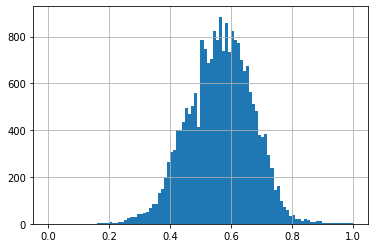

In [97]:
df['living_area_ratio'].hist(bins=100, range =(0, 1))

Какой-то провал и всплеск на значении 0,5, как-будто специально подтягивают соотношение.

### Отношение площади кухни к общей

In [98]:
df['kitchen_area_ratio'] = df['kitchen_area']/df['total_area']

<AxesSubplot:>

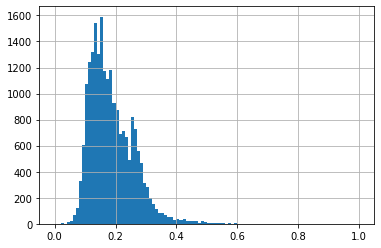

In [99]:
df['kitchen_area_ratio'].hist(bins=100, range =(0, 1))

## Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

### Площадь, цена, число комнат, высота потолков

<AxesSubplot:>

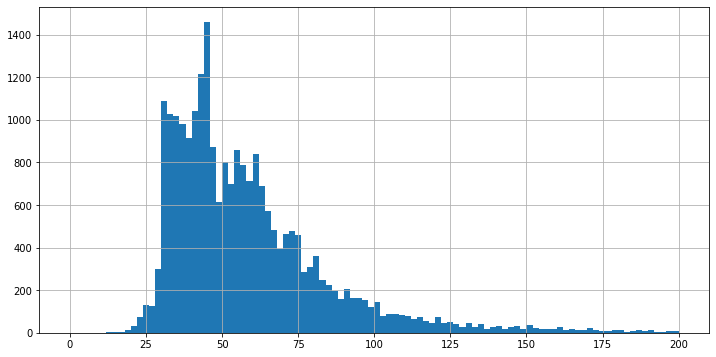

In [100]:
df['total_area'].hist(bins=100, range=(0, 200), figsize=(12, 6))

Высокий пик вероятно у самых популярных квартир - однушек.

<AxesSubplot:>

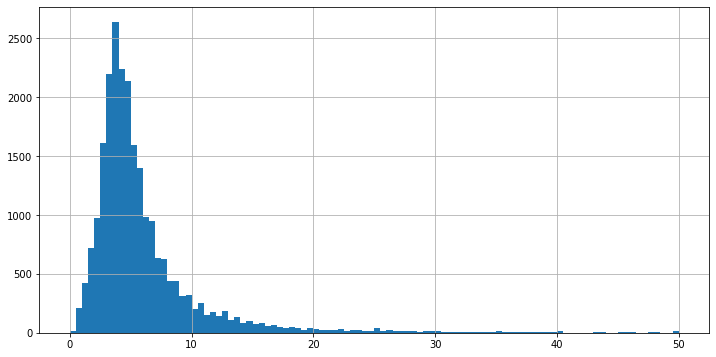

In [101]:
df['price_millions'].hist(bins=100, range = (0, 50), figsize=(12, 6))

Основная часть квартир продавалась по цене около 4 млн, и единицы - более 20 млн

<AxesSubplot:>

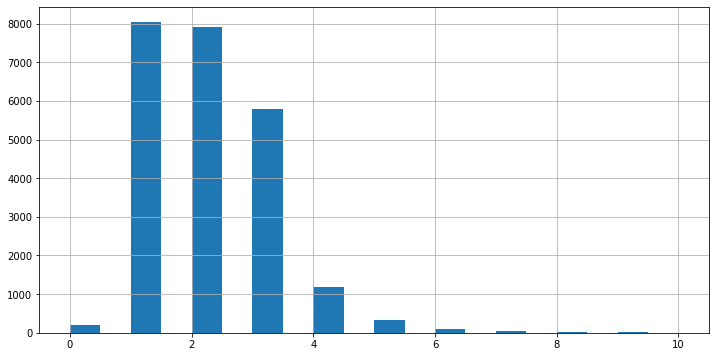

In [102]:
df['rooms'].hist(bins=20, range = (0, 10), figsize=(12, 6))

Основную массу продаж составляют 1, 2 и чуть меньше 3-комнатные квартиры. 

Как мы выяснили раньше, квартиры без комнат это студии или квартиры со свободной планировкой.

<AxesSubplot:>

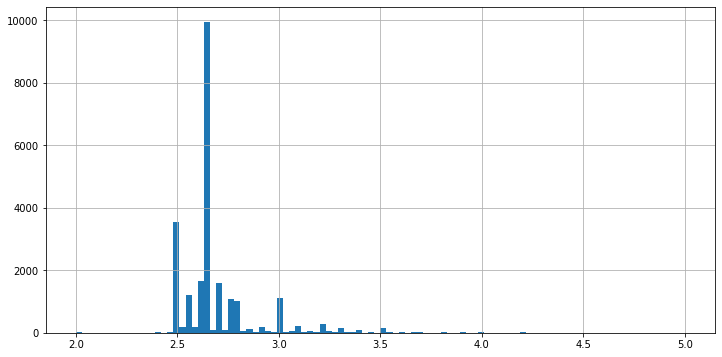

In [103]:
df['ceiling_height'].hist(bins=100, range = (2, 5), figsize=(12, 6))

Подаляющее большинство квартир имеет стандарт высоты потолка 2,65. Есть и другие стандарты менее распространённые в диапазоне от 2,5 до 3 м. 

Имеются также экзотичные квартиры с 2-метровыми потолками. Есть подозрение, что это какая-то ошибка. Даже в хрущёвках высота 2,45 м.

In [104]:
df[df['ceiling_height'] == 2][['locality_name', 'floors_total', 'floor']]

,locality_name,floors_total,floor
552,Санкт-Петербург,15,6
2572,Луга,5,4
4212,Тосно,18,9
5850,Луга,5,5
11352,посёлок Металлострой,17,12
16446,Санкт-Петербург,5,2
16884,Выборг,5,5
19098,Выборг,5,1
19329,Сосновый Бор,9,8
20520,Кудрово,12,9


### Время продажи квартиры

<AxesSubplot:>

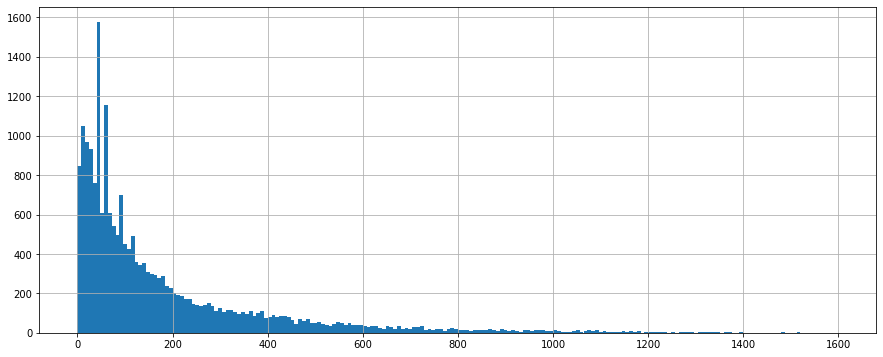

In [105]:
df['days_exposition'].hist(bins=200, range = (0, 1600), figsize=(15, 6))

<AxesSubplot:>

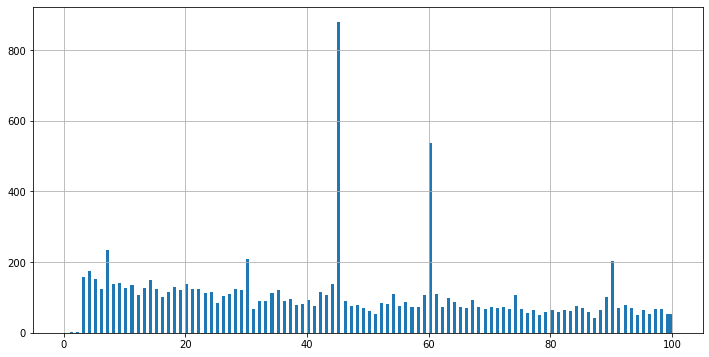

In [106]:
df['days_exposition'].hist(bins=200, range = (0, 100), figsize=(12, 6))

In [107]:
df['days_exposition'].describe()

count    20469.000000
mean       180.761640
std        219.779967
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [108]:
df.sort_values('days_exposition', ascending=False).head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,...,ponds_nearest,days_exposition,price_millions,m2_price,exposition_weekday,exposition_month,exposition_year,floor_feature,living_area_ratio,kitchen_area_ratio
18843,3500000,48.2,2014-12-15,2,2.50,5,27.4,2,False,False,...,<NA>,1580.0,3.50,73000,1 - понедельник,12 - декабрь,2014,другой,0.568465,0.159751
1109,34878556,95.8,2014-12-09,2,2.65,6,58.3,5,True,False,...,569,1572.0,34.88,364000,2 - вторник,12 - декабрь,2014,другой,0.608559,0.208768
9553,10600000,80.0,2014-12-09,3,2.85,17,44.0,9,False,False,...,<NA>,1553.0,10.60,132000,2 - вторник,12 - декабрь,2014,другой,0.550000,0.187500
1885,13300000,79.6,2014-12-09,2,3.00,8,42.7,7,False,False,...,<NA>,1513.0,13.30,167000,2 - вторник,12 - декабрь,2014,другой,0.536432,0.226131
20969,13300000,133.0,2015-02-11,4,3.00,5,58.0,2,False,False,...,534,1512.0,13.30,100000,3 - среда,02 - февраль,2015,другой,0.436090,0.338346


Самые быстрые и частые продажи с 3-х дней размещения, затем частота медленно падает. Мы можем заметить интересные всплески продаж на 7-й, 30, 45, 60 и 90 день публикации. Возможно, происходит какая-то массовая автоматизированная обработка объявлений.

Самые быстрые продажи происходят за 3 дня. Четвертая часть за полтора месяца и половина продаж происходит за первые 3 месяца. Есть предложения, которые ждут покупателя не один год.

In [109]:
df = df.query('3 < days_exposition < 1000')

Уберём объявления которые продавались меньше 3 дней (4 шт.) и больше 1000 дней (< 3%) как очень редкие

In [110]:
len(df.query('ceiling_height <= 2'))

11

In [111]:
df = df.query('ceiling_height > 2')

Уберём странные квартиры для хоббитов

In [112]:
len(df.query('rooms > 10'))

6

In [113]:
df = df[df['days_exposition'].isnull()==False]

Строк, где пропущен срок размещения 13%. К сожалению, мы не можем быть уверены, проданы эти квартиры или нет. Удалим строки.

Поисхождение пропусков в поле **Срок размещения** требует пояснения специалистов, которые делали выгрузку. Я исходил из логики, что цена квартиры имеет значение, когда совершена сделка. Отсутствие срока снятия объявления, говорит о том, что квартира не продана, и цена не является рыночной. Так как всё исследование у нас основано на том, как кореллирует стоимость, то эти неподтверждённые данные могут исказить картину. Кто знает, почему они не продавались...

In [114]:
df['floor'].describe()

count    20018.000000
mean         5.991408
std          4.943041
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:>

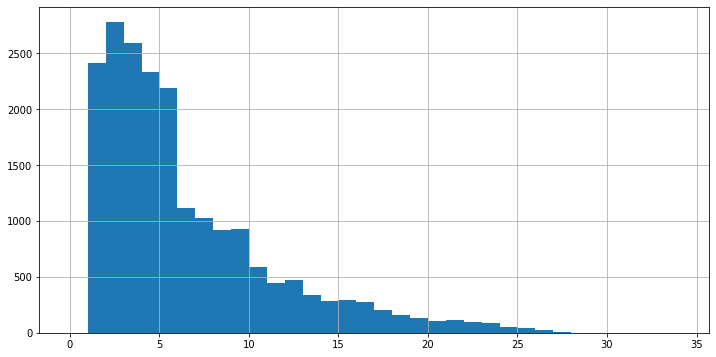

In [115]:
df['floor'].hist(bins=34, range = (0, 34), figsize=(12, 6))

In [116]:
len(df[df['floor']> df['floors_total']])

0

С этажами всё в порядке

<AxesSubplot:>

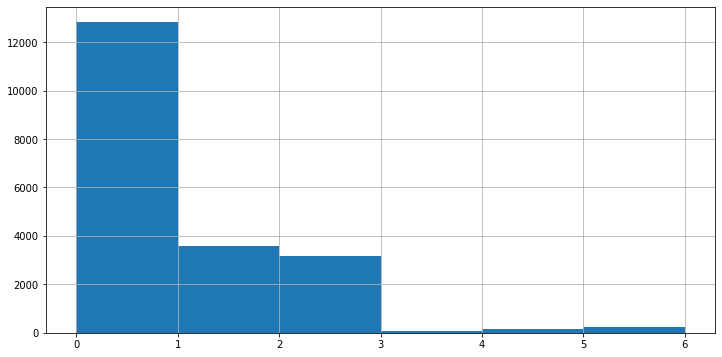

In [117]:
df['balcony'].hist(bins=6, range = (0, 6), figsize=(12, 6))

Немного странно, что количество квартир с 4, 5 и 6 балконами больше, чем с 3-мя

<AxesSubplot:>

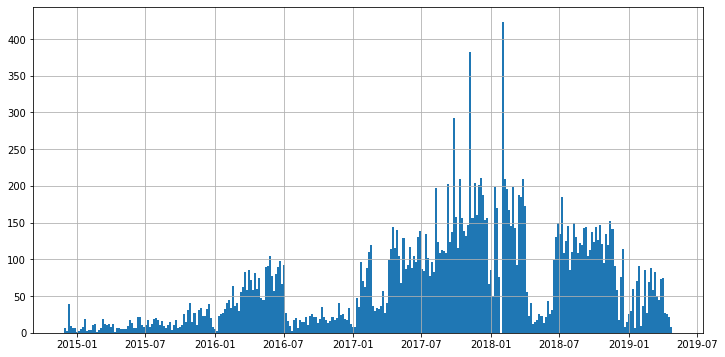

In [118]:
df['first_day_exposition'].hist(bins=300, figsize=(12, 6))

Интересные спады и подъёмы активности сервиса, особенно во второй половине 2016го и весной 2018го. И что-то он сбавил обороты перед 2019...

<AxesSubplot:>

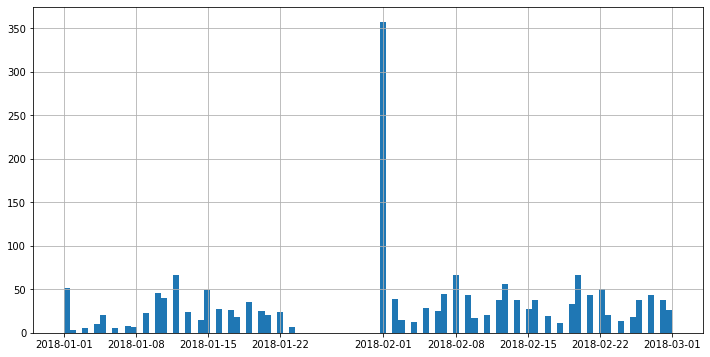

In [119]:
df['first_day_exposition'].hist(bins=100, range=('2018-01', '2018-03'), figsize=(12, 6))

Интересное затишье и резкий скачок объявлений с начала февраля. Возможно, сервис неделю лежал. 

<AxesSubplot:>

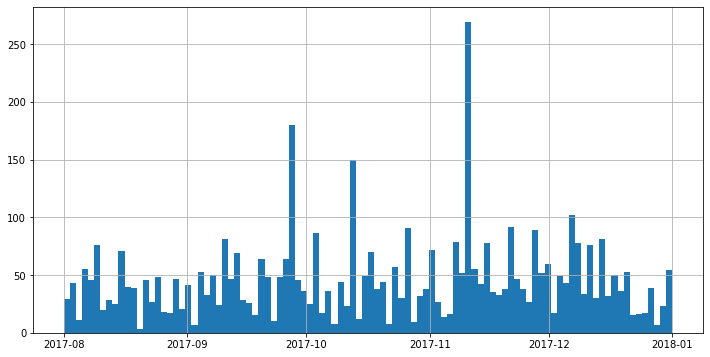

In [120]:
df['first_day_exposition'].hist(bins=100, range=('2017-08', '2018-01'), figsize=(12, 6))

Три пика осенью 2017го, что бы это могло быть? Спекуляции? На реакцию на рынке не похоже, средние значения в норме.

Других аномалей, всплесков и прочих отклонений не встретилось

### Факторы влияющие на стоимость квартиры

In [121]:
df['price_millions'].corr(df['total_area'])

0.6402601375941058

<AxesSubplot:xlabel='total_area', ylabel='price_millions'>

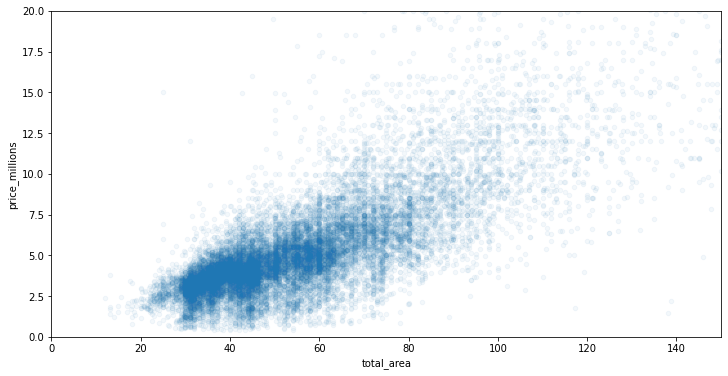

In [122]:
df.plot(x='total_area', y='price_millions', xlim = (0, 150), ylim = (0, 20),  kind='scatter', alpha=0.05, figsize=(12,6))

Можно видеть, что ***цена зависит от общей площади***, чем больше площадь, тем выше цена

In [123]:
df['price_millions'].corr(df['m2_price'])

0.7372512775843424

In [124]:
df['price_millions'].corr(df['living_area'])

0.5526111100454618

<AxesSubplot:xlabel='living_area', ylabel='price_millions'>

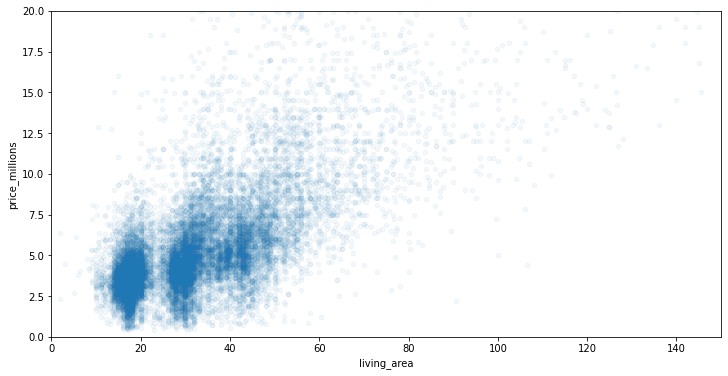

In [125]:
df.plot(x='living_area', y='price_millions', xlim = (0, 150), ylim = (0, 20),  kind='scatter', alpha=0.05, figsize=(12,6))

Цена зависит от общей площади больше, нежели от жилой

In [126]:
df['price_millions'].corr(df['living_area_ratio'])

0.003903634100773908

<AxesSubplot:xlabel='living_area_ratio', ylabel='price_millions'>

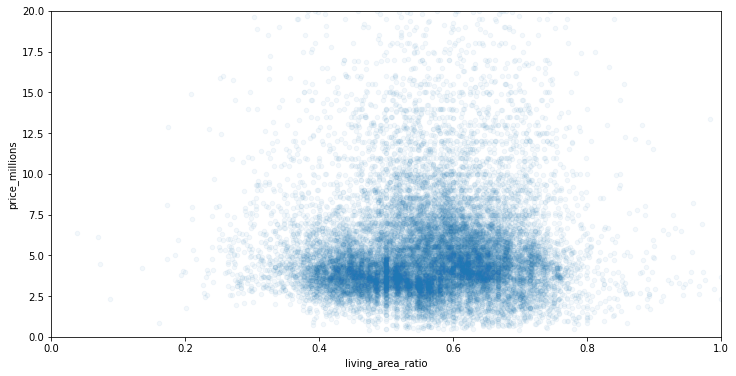

In [127]:
df.plot(x='living_area_ratio', y='price_millions', xlim = (0, 1), ylim = (0, 20),  kind='scatter', alpha=0.05, figsize=(12,6))

Соотношение жилой и общей площади, как видно никак не влияет, пятнышко вытянуто по горизонтали.

In [128]:
df['price_millions'].corr(df['kitchen_area_ratio'])

-0.09203450909159078

Отношение площади кухни к общей, также не влияет на цену, коэффициент корреляции близок к нулю

In [129]:
df['price_millions'].corr(df['rooms'])

0.3520614692560485

<AxesSubplot:xlabel='rooms', ylabel='price_millions'>

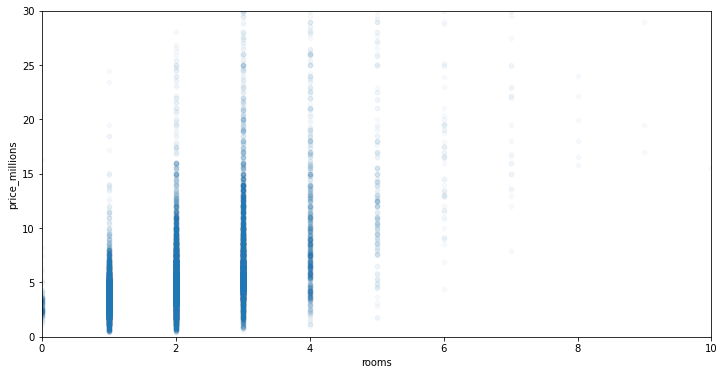

In [130]:
df.plot(x='rooms', y='price_millions', xlim = (0, 10), ylim = (0, 30),  kind='scatter', alpha=0.03, figsize=(12,6))

<AxesSubplot:title={'center':'Объявлений по количеству комнат'}, ylabel='rooms'>

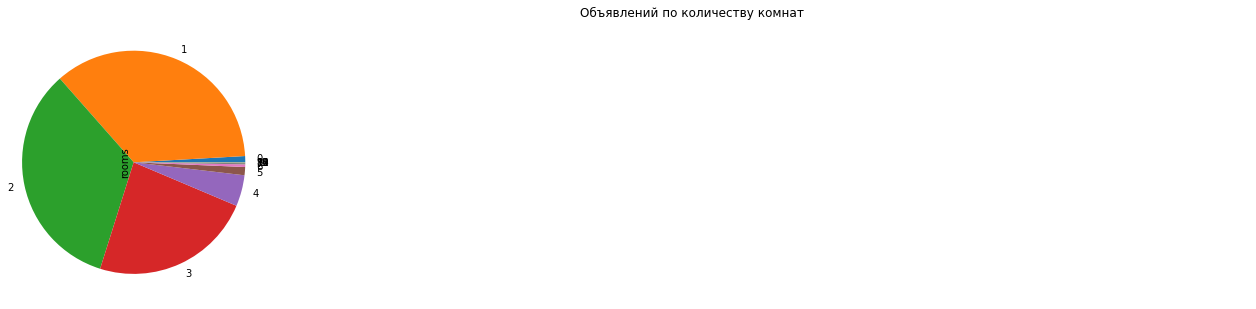

In [131]:
df.groupby('rooms')['rooms'].count().plot(kind='pie', xlim = (0, 10), grid=True, figsize=(20,20), title="Объявлений по количеству комнат")

<AxesSubplot:title={'center':'Зависимость стоимости квартиры от количества комнат'}, xlabel='rooms'>

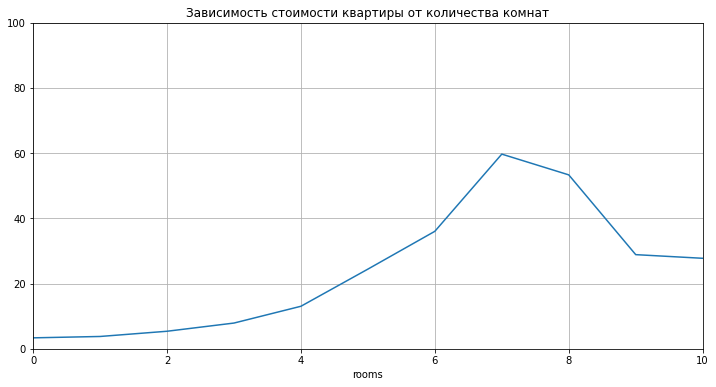

In [132]:
df.groupby('rooms')['price_millions'].mean().plot( xlim = (0, 10), ylim = (0, 100),grid=True,figsize=(12,6), title='Зависимость стоимости квартиры от количества комнат')

In [133]:
len(df.query('rooms > 10'))

6

Больше всего объявлений о продаже 1,2 - комнатных, чуть меньше 3-комнатнатных.

Очевидно предположить, что, ***чем больше комнат, тем больше площадь, и, тем выше цена***. Как и общаяя площадь так и количество комнат увеличивают цен.

Отметим, что эта зависимость хорошо видна на числе комнат до 7. На предложениях с числом комнат более 7 разброс в ценах очень хаотичный, и таких предложений уже мало, чтобы можно было говорить о какой-то системе.

<AxesSubplot:xlabel='city_centers_nearest', ylabel='price_millions'>

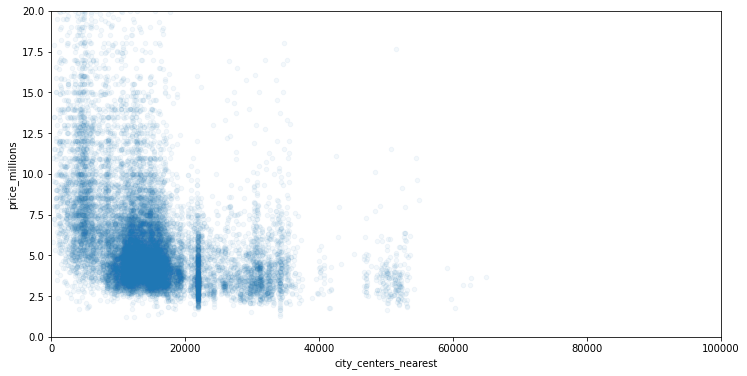

In [134]:
df.plot(x='city_centers_nearest', y='price_millions', xlim = (0, 100000), ylim = (0, 20),  kind='scatter', alpha=0.05, figsize=(12,6))

In [135]:
df['center_distance'] = round(df['city_centers_nearest'] / 1000, 0)

In [136]:
df.groupby('center_distance')['price_millions'].agg(['count','mean']).head(10)

,count,mean
center_distance,,
0.0,17,29.169412
1.0,160,19.092562
2.0,249,17.866145
3.0,268,10.367985
4.0,555,13.144703
5.0,740,13.784676
6.0,506,14.669526
7.0,341,13.715279
8.0,501,9.412156


<AxesSubplot:title={'center':'Зависимость стоимости квартиры от удалённости от центра'}, xlabel='center_distance'>

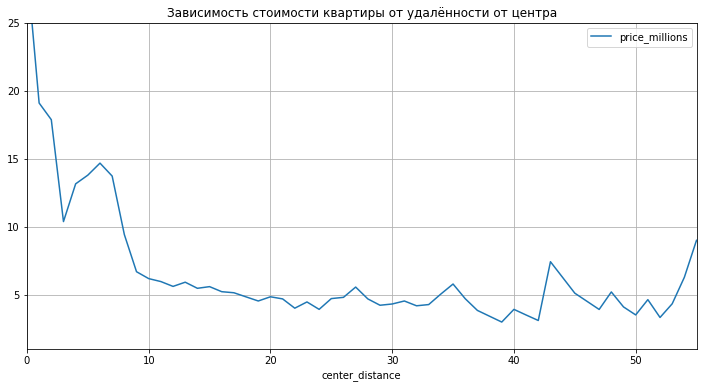

In [137]:
df.groupby('center_distance')[['price_millions']].mean().plot(ylim=(1,25), xlim=(0, 55),grid=True,figsize=(12,6), title='Зависимость стоимости квартиры от удалённости от центра')

Видим 3 зоны с характерным поведением графика. Первая в центре - пик цен, стабильная середина и полобразный хвост. Пик в центре объясним элитностью и высоким спросом, пилооразность на третьем участке объясняет свои локальные центры притяжения в городах сателитах.

<AxesSubplot:title={'center':'Зависимость стоимости кв. м площади от удалённости от центра'}, xlabel='center_distance'>

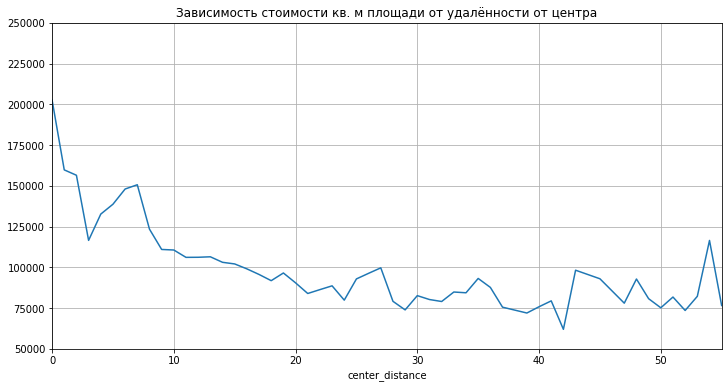

In [138]:
df.groupby('center_distance')['m2_price'].mean().plot(ylim=(50000,250000), xlim=(0, 55),grid=True,figsize=(12,6), title='Зависимость стоимости кв. м площади от удалённости от центра')

Стоимость квадратного метра имеет такую же зависимость, Получается, что квартиры в центре имеют больший спрос.

In [139]:
pd.pivot_table(df, values='price_millions', index=['floor_feature'], aggfunc='mean').sort_values(by='price_millions', ascending=False)

,price_millions
floor_feature,
последний,6.936448
другой,6.382197
первый,4.481941


Квартиры на первом этаже в среднем на 20% дешевле

<AxesSubplot:title={'center':'Зависимость стоимости квартиры на разных этажах'}, xlabel='center_distance'>

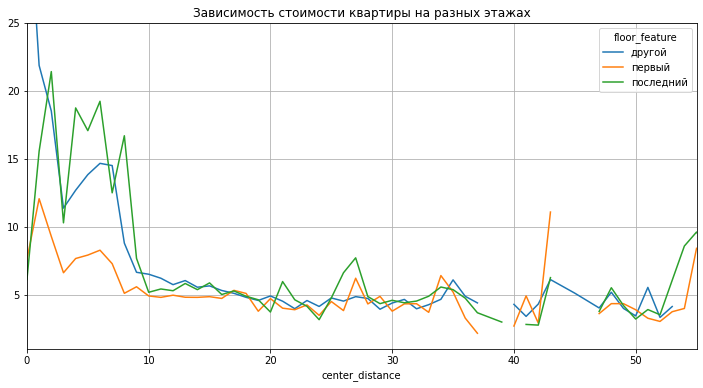

In [140]:
pd.pivot_table(df, values='price_millions', index=['center_distance'],
                    columns=['floor_feature'], aggfunc='mean').plot(ylim=(1,25), xlim=(0, 55), grid=True,figsize=(12,6), title='Зависимость стоимости квартиры на разных этажах')

<AxesSubplot:title={'center':'Стоимость квартир в многоэтажках'}, xlabel='floors_total'>

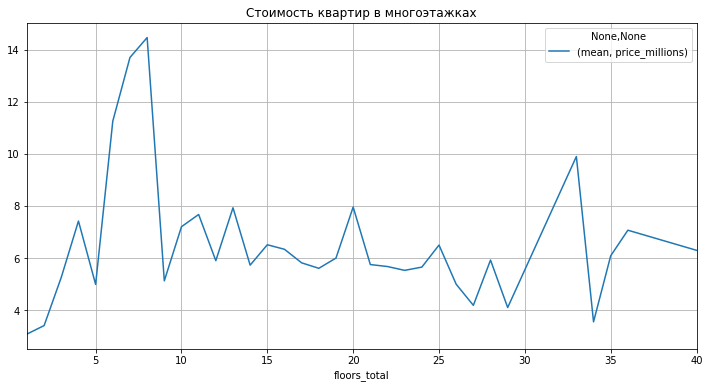

In [141]:
pd.pivot_table(df, values='price_millions', index=['floors_total'],
                     aggfunc=['mean']).plot(xlim=(1, 40), grid=True,figsize=(12,6), title='Стоимость квартир в многоэтажках') 

Самые высокие цены в 6, 7, 8-этажных домах

<AxesSubplot:title={'center':'Зависимость стоимости квартир от высоты потолка '}, xlabel='ceiling_height'>

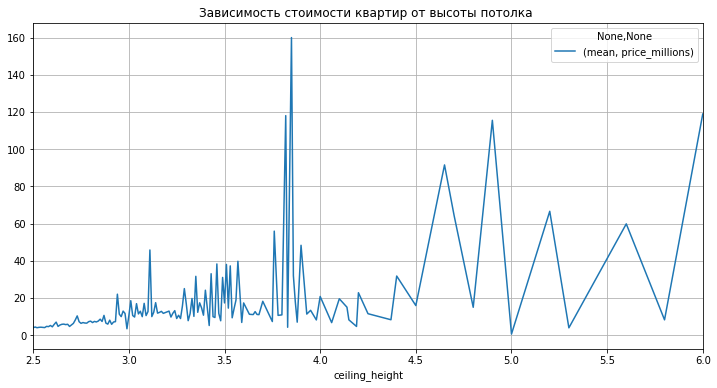

In [142]:
pd.pivot_table(df, values='price_millions', index=['ceiling_height'],
                     aggfunc=['mean']).plot(xlim=(2.5, 6), grid=True,figsize=(12,6), title='Зависимость стоимости квартир от высоты потолка ') 

Стандартные потолки имеют более стабильную цену, тогда как нестандартные потолки дают большие скачки цен. Нестадартные потолки имеют большую стоимость.

<AxesSubplot:title={'center':'Средняя стоимость квартир от дня недели выставления на продажу'}, xlabel='exposition_weekday'>

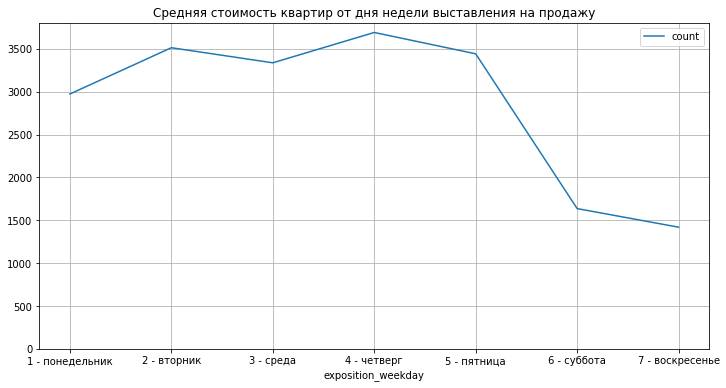

In [143]:
df.groupby('exposition_weekday')['price_millions'].agg(['count']).plot(ylim=0, grid=True,figsize=(12,6), title='Средняя стоимость квартир от дня недели выставления на продажу')

<AxesSubplot:title={'center':'Количество квартир от дня недели выставления на продажу'}, xlabel='exposition_weekday'>

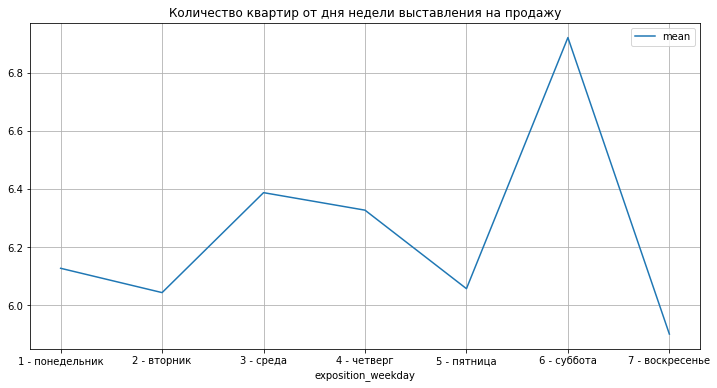

In [144]:
df.groupby('exposition_weekday')['price_millions'].agg(['mean']).plot(grid=True,figsize=(12,6), title='Количество квартир от дня недели выставления на продажу')

Количество объявлений естественным образом падает в выходные. Но, при этом, средняя стоимость квартир выставляемых имеет пик в субботу. Самые дешёвые квартиры выставляют во вторник.

<AxesSubplot:title={'center':'Максимальные цены квартир по месяцам выставления'}, xlabel='exposition_month'>

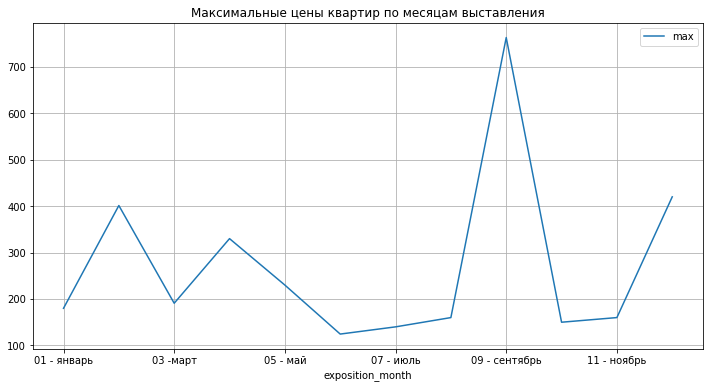

In [145]:
df.groupby('exposition_month')['price_millions'].agg(['max']).plot(grid=True,figsize=(12,6), title='Максимальные цены квартир по месяцам выставления')

<AxesSubplot:title={'center':'Средние цены квартир по месяцам выставления'}, xlabel='exposition_month'>

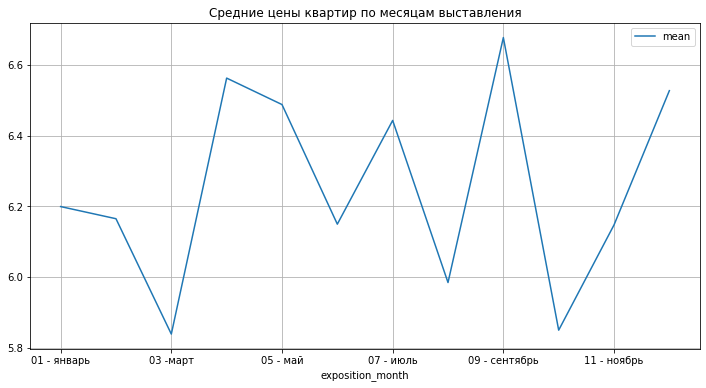

In [146]:
df.groupby('exposition_month')['price_millions'].agg(['mean']).plot(grid=True,figsize=(12,6), title='Средние цены квартир по месяцам выставления')

Самые дорогие квартиры выставляли больше в апреле и сентябре и меньше всего в марте и октябре

<AxesSubplot:xlabel='exposition_month'>

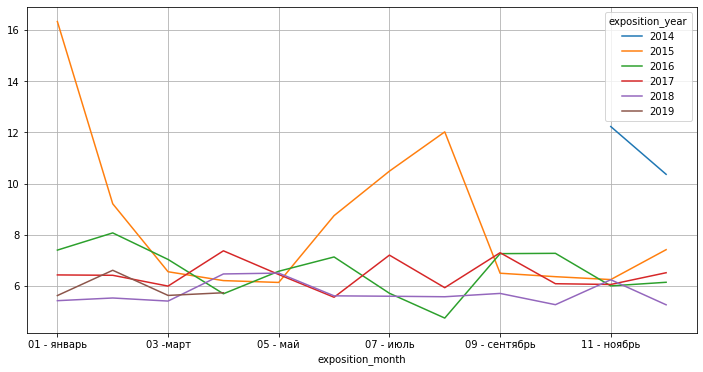

In [147]:
pd.pivot_table(df, values='price_millions', index=['exposition_month'],
                    columns=['exposition_year'], aggfunc='mean').plot(grid=True,figsize=(12,6)) 

А вот если помотреть по годам, то не всё так однозначно

In [148]:
df.groupby('exposition_year')['price_millions'].agg(['mean', 'count'])

,mean,count
exposition_year,,
2014,10.546857,70
2015,8.039690,904
2016,6.680506,2666
2017,6.454304,7847
2018,5.618365,7481
2019,5.910562,1050


Выборка по 2014 году не очень большая

<AxesSubplot:title={'center':'Средняя стоимость квартир по годам'}, xlabel='exposition_year'>

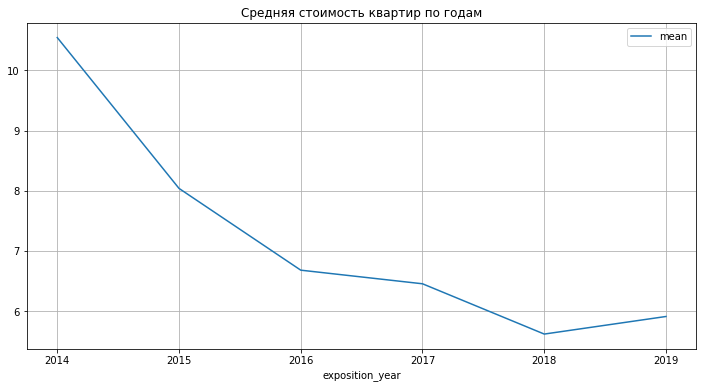

In [149]:
df.groupby('exposition_year')['price_millions'].agg(['mean']).plot(grid=True,figsize=(12,6), title='Средняя стоимость квартир по годам')

Самые высокие цены на жильё были в 2014, к 2016 они упали и лишь после 2018 снова начался подъём цен

In [150]:
df_exposition_by_rooms = pd.pivot_table(df, 
               values='days_exposition', 
               index=['rooms'],
               aggfunc=['mean', 'count'])

In [151]:
df_exposition_by_rooms = pd.pivot_table(df, 
               values='days_exposition', 
               index=['rooms'],
               aggfunc=['mean', 'count'])
df_exposition_by_rooms = df_exposition_by_rooms[df_exposition_by_rooms[('count', 'days_exposition')] > 10]
df_exposition_by_rooms = df_exposition_by_rooms.drop(('count', 'days_exposition'), 1)
df_exposition_by_rooms.sort_values(by=('mean', 'days_exposition')).head(10)


,mean
,days_exposition
rooms,
0,111.553073
1,151.367705
2,161.191268
3,189.381540
7,197.945946
4,226.189369
5,251.607595
6,263.493333


<AxesSubplot:title={'center':'Среднее время продаж в зависимости от количества комнат'}, xlabel='rooms'>

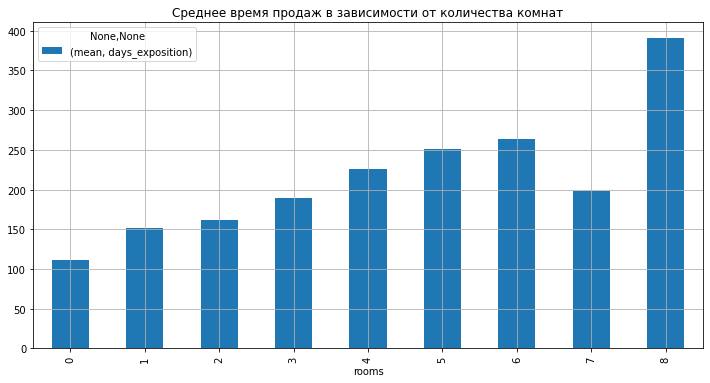

In [152]:
df_exposition_by_rooms.plot(kind='bar',grid=True,figsize=(12,6), title='Среднее время продаж в зависимости от количества комнат')

Заметно быстрее продаются студии (за 3 месяца), однушки и двушки. в среднем за 5 с небольшим месяца.

In [153]:
df_exposition_by_ceiling_height = pd.pivot_table(df, 
               values='days_exposition', 
               index=['ceiling_height'],               
               aggfunc=['mean', 'count'])
df_exposition_by_ceiling_height = df_exposition_by_ceiling_height[df_exposition_by_ceiling_height[('count', 'days_exposition')] > 10]
df_exposition_by_ceiling_height = df_exposition_by_ceiling_height.drop(('count', 'days_exposition'), 1)
df_exposition_by_ceiling_height.sort_values(by=('mean', 'days_exposition')).head(10)


,mean
,days_exposition
ceiling_height,
2.40,109.380952
3.55,114.090909
2.78,137.225000
2.68,141.571429
2.52,145.819444
2.84,147.375000
2.74,152.416667
2.50,155.481992


<AxesSubplot:title={'center':'Средннее время продаж в зависимости от высоты потолков'}, xlabel='ceiling_height'>

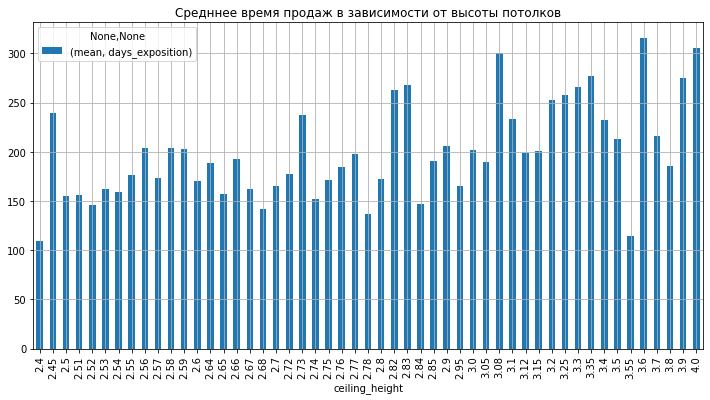

In [154]:
df_exposition_by_ceiling_height.plot(kind='bar',grid=True,figsize=(12,6), title='Средннее время продаж в зависимости от высоты потолков')

Есть небольшая зависимость роста длительности продажи от увеличения высоты потолков. 

<AxesSubplot:xlabel='days_exposition'>

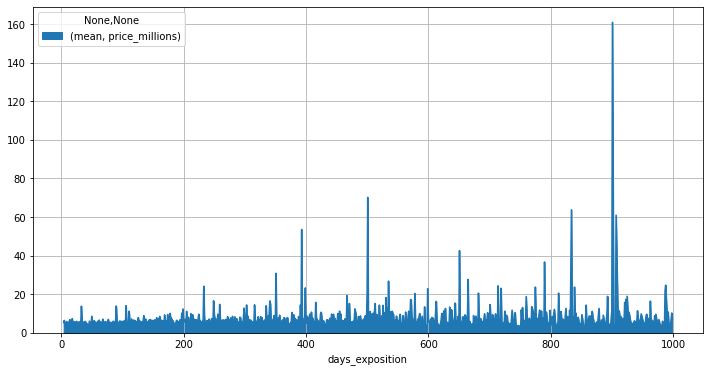

In [155]:
pd.pivot_table(df, values='price_millions', index=['days_exposition'],
                     aggfunc=['mean']).plot(kind='area', grid=True,figsize=(12,6)) 

Судя по высоким пикам в правой части графика, чем цена квартиры выше средних, тем больше времени может уходить на её продажу.

### Топ 10 населённых пунктов

In [156]:
top10_locality = df.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)

In [157]:
df_top10_locality = df.query('locality_name in @top10_locality.index')

In [158]:
df_top10_locality.pivot_table(index='locality_name', values='m2_price', aggfunc='mean').sort_values(by='m2_price', ascending=False)

,m2_price
locality_name,
Санкт-Петербург,112266.301082
Пушкин,102187.290970
деревня Кудрово,92386.986301
посёлок Парголово,89303.030303
посёлок Мурино,85670.979667
посёлок Шушары,78024.937656
Колпино,74880.794702
Всеволожск,68620.895522
Гатчина,67909.433962


По стоимости квадратного метра лидирует Питер, Пушкин и деревня Кудрово и замыкает десятку Выборг

### Санкт-Петербург 

In [159]:
df_spb = df[df['locality_name']=="Санкт-Петербург"].copy()

In [160]:
df_spb['center_distance'] = round(df_spb['city_centers_nearest'] / 1000, 0)

<AxesSubplot:title={'center':'Стоимость квартир от расстояния до центра'}, xlabel='center_distance'>

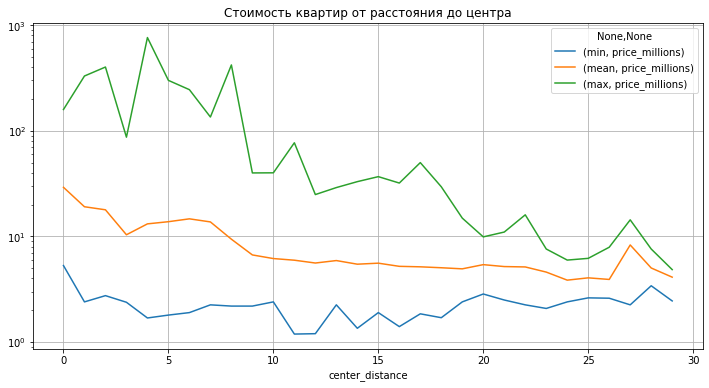

In [161]:
pd.pivot_table(df_spb, values='price_millions', index=['center_distance'], aggfunc=['min', 'mean', 'max']).plot(logy=True, grid=True,figsize=(12,6), title='Стоимость квартир от расстояния до центра') 

In [162]:
len(df_spb.query('center_distance < 9'))

3337

Можно видеть что в пределах 9 км от центра наблидаются самые высокие средние и макимальные цены по предложениям. Видно, что за этой зоной график средней стоимости становится почти прямым. Рассмотрим центральную часть

### Санкт-Петербург. Центр

In [163]:
df_spb_center = df_spb.query('center_distance < 9').copy()

In [164]:
pd.pivot_table(df_spb_center, values='price_millions', index=['floor_feature'], aggfunc='mean').sort_values(by='price_millions', ascending=False)

,price_millions
floor_feature,
последний,16.830125
другой,13.584825
первый,7.737677


Стоимость квартир на первом этаже в центре в 2 раза ниже.

<AxesSubplot:title={'center':'Объявлений по количеству комнат'}, ylabel='rooms'>

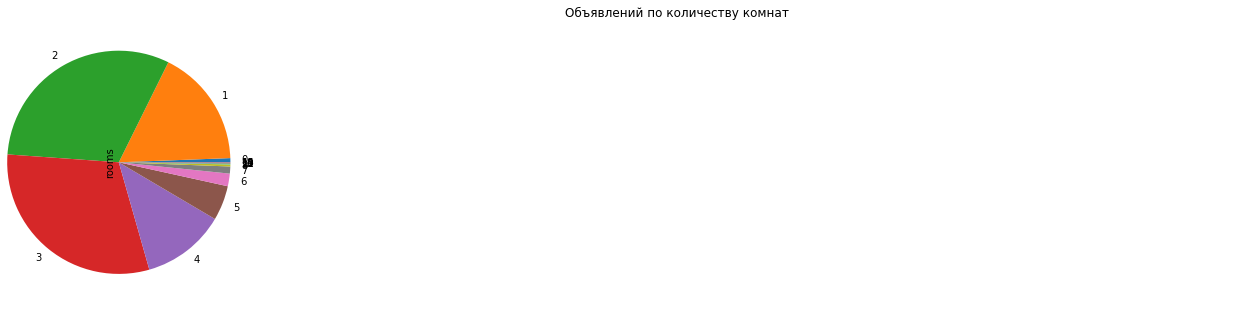

In [165]:
df_spb_center.groupby('rooms')['rooms'].count().plot(kind='pie', xlim = (0, 10), grid=True, figsize=(20,20), title="Объявлений по количеству комнат")

В центре больше продают 2 и 3-комнатные квартиры

<AxesSubplot:title={'center':'Зависимость средней стоимости квартиры от количества комнат'}, xlabel='rooms'>

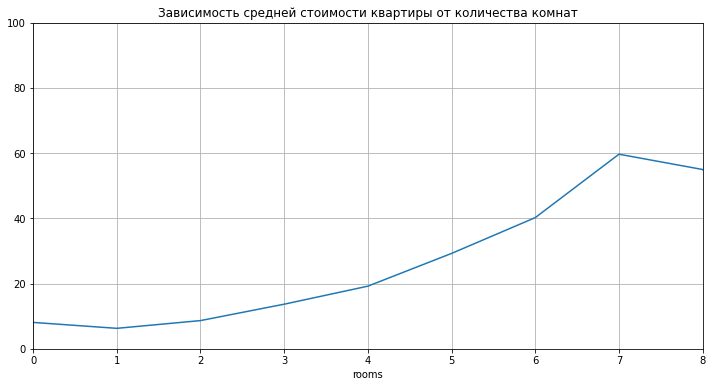

In [166]:
df_spb_center.groupby('rooms')['price_millions'].mean().plot( xlim = (0, 8), ylim = (0, 100),grid=True,figsize=(12,6), title="Зависимость средней стоимости квартиры от количества комнат")

<AxesSubplot:title={'center':'Зависимость стоимости квартир на разных этажах от количества комнат'}, xlabel='rooms'>

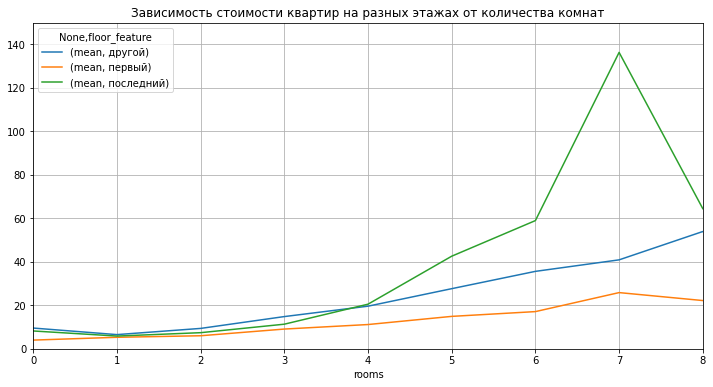

In [167]:
pd.pivot_table(df_spb_center, values='price_millions', index=['rooms'],
                    columns=['floor_feature'], aggfunc=['mean']).plot(xlim=(0, 8), ylim=(0, 150), grid=True,figsize=(12,6), title='Зависимость стоимости квартир на разных этажах от количества комнат') 

Последние этажи явно ценятся в центре, особенно в многокомнатных квартирах, при этом певрвые этажи также не популярны как в общей картине.

In [168]:
df_spb_center['price_millions'].corr(df_spb_center['total_area'])

0.6391390583851445

<AxesSubplot:xlabel='total_area', ylabel='price_millions'>

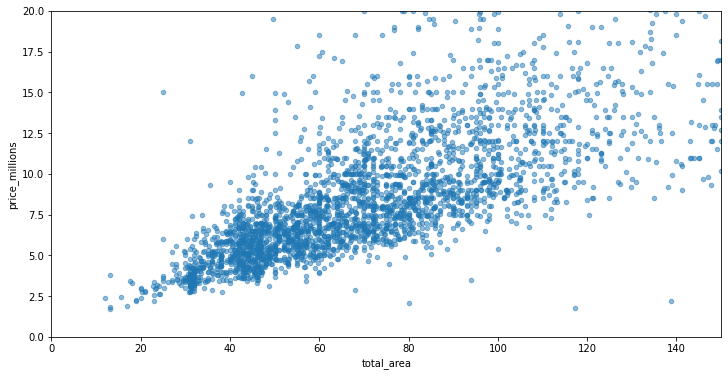

In [169]:
df_spb_center.plot(x='total_area', y='price_millions', xlim = (0, 150), ylim = (0, 20),  kind='scatter', alpha=0.5, figsize=(12,6))

Цена квартиры растёт вместе с площадью, как и на общих данных

<AxesSubplot:title={'center':'Зависимость стоимости квартиры на разных этажах'}, xlabel='center_distance'>

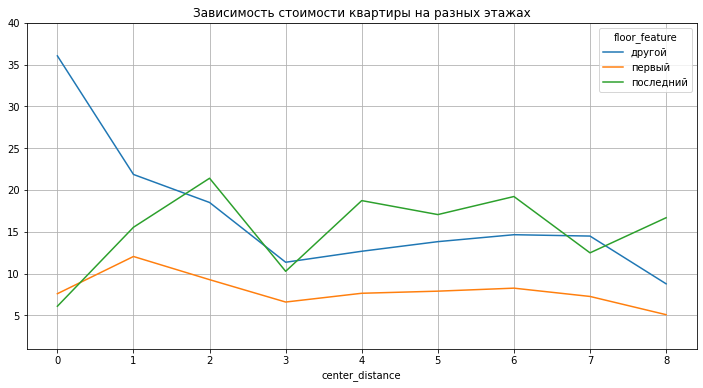

In [170]:
pd.pivot_table(df_spb_center, values='price_millions', index=['center_distance'],
                    columns=['floor_feature'], aggfunc='mean').plot(ylim=(1,40), grid=True,figsize=(12,6), title='Зависимость стоимости квартиры на разных этажах')

<AxesSubplot:title={'center':'Стоимость квартир в зависимости от удалённости от центра'}, xlabel='center_distance'>

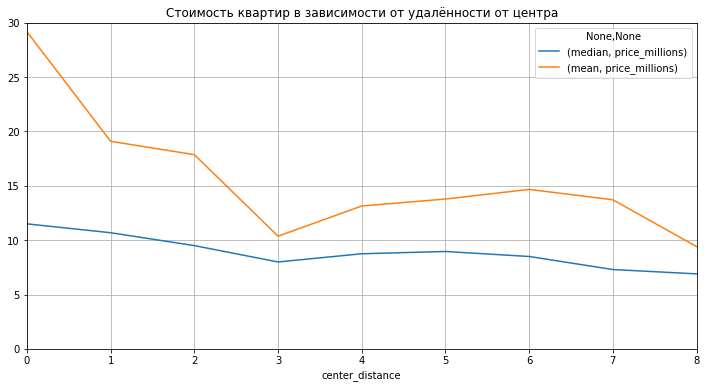

In [171]:
pd.pivot_table(df_spb_center, values='price_millions', index=['center_distance'],
                    aggfunc=['median', 'mean']).plot(xlim=(0, 8), ylim=(0, 30), grid=True,figsize=(12,6), title='Стоимость квартир в зависимости от удалённости от центра') 

<AxesSubplot:title={'center':'Стоимость квадратного метра в зависимости от удалённости от центра'}, xlabel='center_distance'>

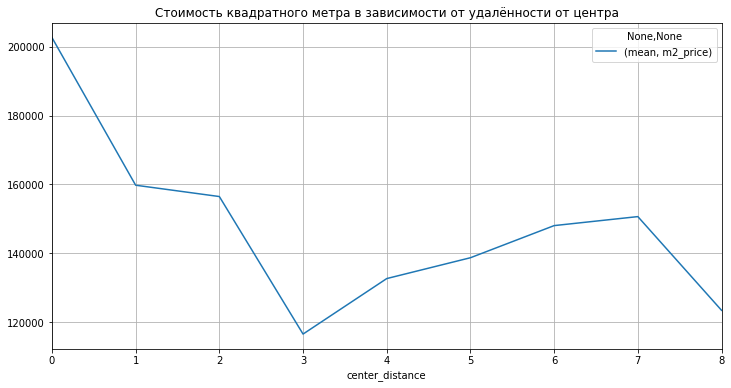

In [172]:
pd.pivot_table(df_spb_center, values='m2_price', index=['center_distance'],
                     aggfunc=['mean']).plot(xlim=(0, 8), grid=True,figsize=(12,6), title='Стоимость квадратного метра в зависимости от удалённости от центра') 

Цена квадратного метра падает при удалении от центра. На графике виден провал на расстоянии 3 км от центра. Возможно, это спальные рабочие районы старого города. Жилой фонд там возможно попроще. 

In [173]:
pd.pivot_table(df_spb_center, values='price_millions', index=['floors_total'],
                     aggfunc=['mean', 'count']).sort_values(by=('mean', 'price_millions'), ascending=False).head(5)

,mean,count
,price_millions,price_millions
floors_total,,
25,34.275556,18
8,26.041040,125
7,21.962000,220
20,20.164737,19
15,19.269167,24


Лидеры по цене квартир среди многоэтажек

<AxesSubplot:title={'center':'Стоимость квартир в многоэтажках'}, xlabel='floors_total'>

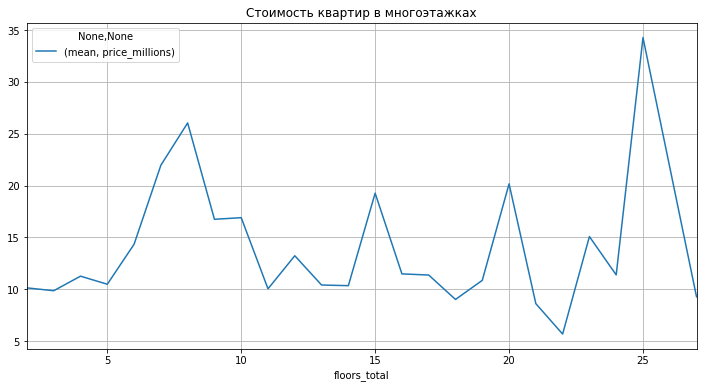

In [174]:
pd.pivot_table(df_spb_center, values='price_millions', index=['floors_total'],
                     aggfunc=['mean']).plot(xlim=(2, 27), grid=True,figsize=(12,6), title='Стоимость квартир в многоэтажках') 

В центре некторые дома имеют большую стоимость квартир, например, 8-и и 25-этажные дома, возможно более свежей постройки.

<AxesSubplot:title={'center':'Зависимость стоимости квартир от высоты потолка '}, xlabel='ceiling_height'>

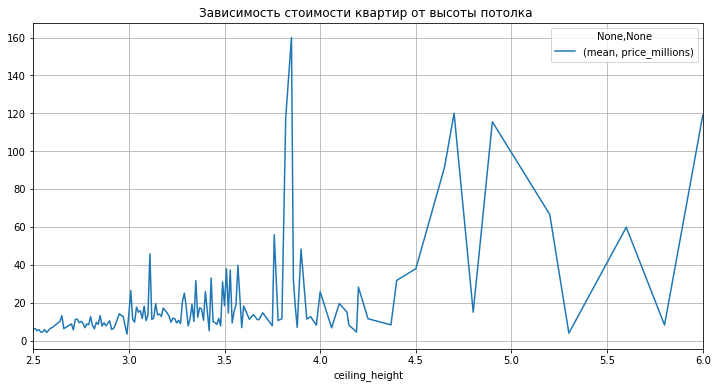

In [175]:
pd.pivot_table(df_spb_center, values='price_millions', index=['ceiling_height'],
                     aggfunc=['mean']).plot(xlim=(2.5, 6), grid=True,figsize=(12,6), title='Зависимость стоимости квартир от высоты потолка ') 

Мы видим, что квартиры с высокими нестандартными потолками имеют занчительные пики на графике, квартиры со стандартными потолками имеют стабильную цену.

<AxesSubplot:title={'center':'Количество квартир от месяца выставления на продажу'}, xlabel='exposition_weekday'>

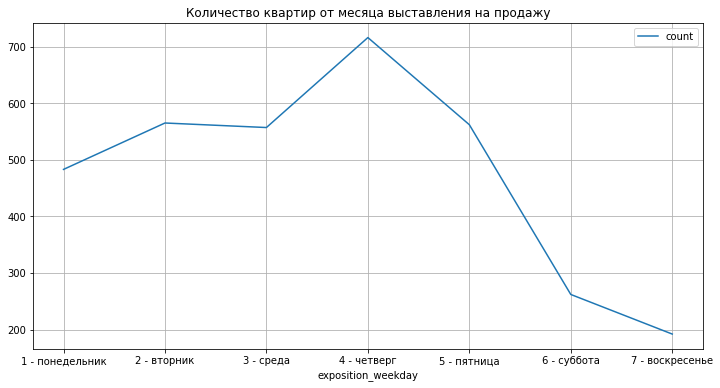

In [176]:
df_spb_center.groupby('exposition_weekday')['price_millions'].agg(['count']).plot(grid=True,figsize=(12,6), title='Количество квартир от месяца выставления на продажу')

<AxesSubplot:title={'center':'Средняя стоимость квартир от дня недели выставления на продажу'}, xlabel='exposition_weekday'>

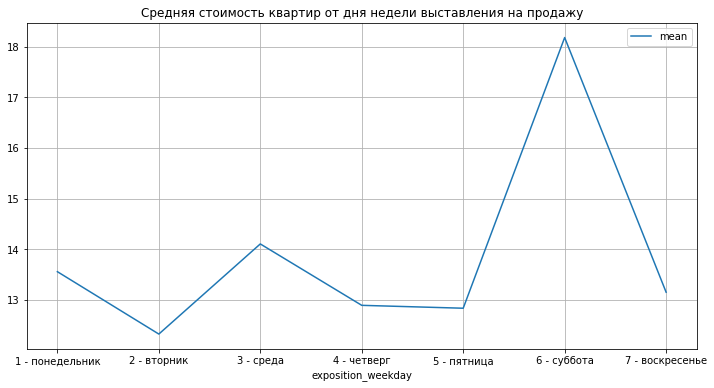

In [177]:
df_spb_center.groupby('exposition_weekday')['price_millions'].agg(['mean']).plot(grid=True,figsize=(12,6), title='Средняя стоимость квартир от дня недели выставления на продажу')

В субботу средняя цена выставляемых квартир выше.

<AxesSubplot:title={'center':'Средняя стоимость квартир от дня недели выставления на продажу'}, xlabel='exposition_weekday'>

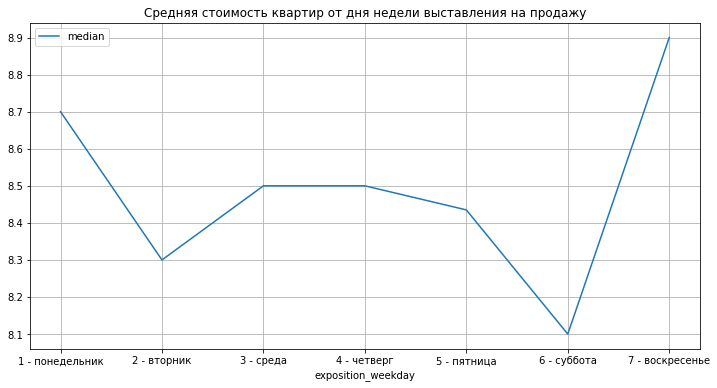

In [178]:
df_spb_center.groupby('exposition_weekday')['price_millions'].agg(['median']).plot(grid=True,figsize=(12,6), title='Средняя стоимость квартир от дня недели выставления на продажу')

<AxesSubplot:title={'center':'Средняя стоимость квартир от месяца выставления на продажу'}, xlabel='exposition_month'>

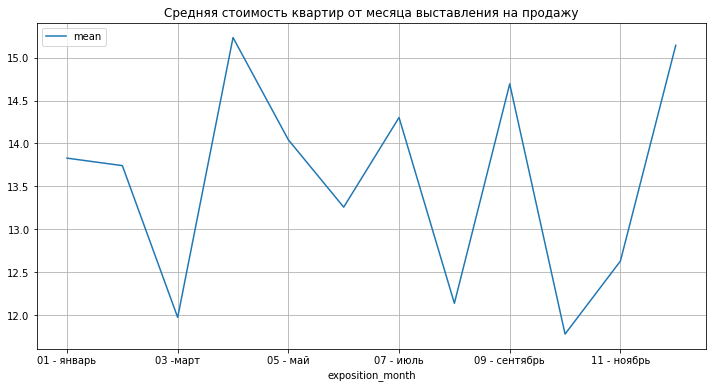

In [179]:
df_spb_center.groupby('exposition_month')['price_millions'].agg(['mean']).plot(grid=True,figsize=(12,6), title='Средняя стоимость квартир от месяца выставления на продажу')

В центре самые дорогие квартиры выставляются в декабре, возможно с расчётом на покупателей с большими новогодними бонусами.

<AxesSubplot:title={'center':'Масимальная стоимость квартир от месяца выставления на продажу'}, xlabel='exposition_month'>

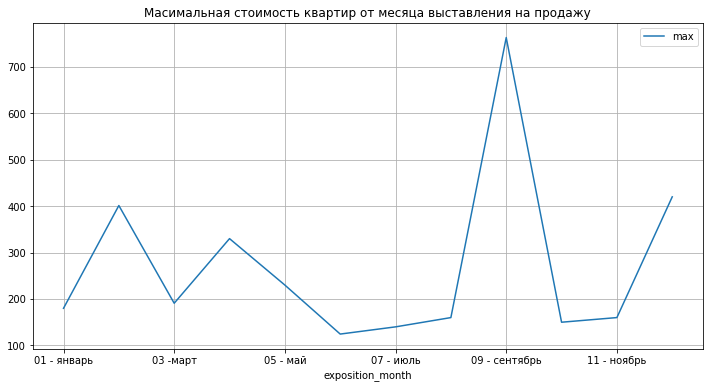

In [180]:
df_spb_center.groupby('exposition_month')['price_millions'].agg(['max']).plot(grid=True,figsize=(12,6), title='Масимальная стоимость квартир от месяца выставления на продажу')

<AxesSubplot:title={'center':'Средняя стоимость квартир по годам (центр)'}, xlabel='exposition_year'>

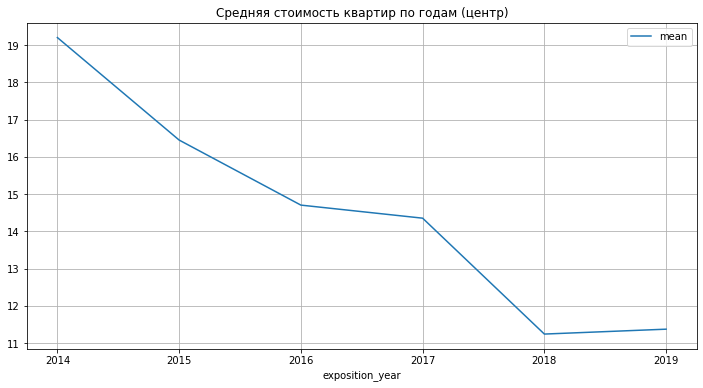

In [181]:
df_spb_center.groupby('exposition_year')['price_millions'].agg(['mean']).plot(grid=True,figsize=(12,6), title='Средняя стоимость квартир по годам (центр)')

In [182]:
df_spb_center_exposition_by_rooms = pd.pivot_table(df_spb_center, 
               values='days_exposition', 
               index=['rooms'],               
               aggfunc=['mean', 'count'])
df_spb_center_exposition_by_rooms = df_spb_center_exposition_by_rooms[df_spb_center_exposition_by_rooms[('count', 'days_exposition')] > 10]
df_spb_center_exposition_by_rooms = df_spb_center_exposition_by_rooms.drop(('count', 'days_exposition'), 1)
df_spb_center_exposition_by_rooms.sort_values(by=('mean', 'days_exposition')).head(10)


,mean
,days_exposition
rooms,
0,111.250000
2,186.354467
1,187.561404
7,209.382353
3,222.698724
4,268.992574
5,271.636905
6,284.836066


<AxesSubplot:title={'center':'Среднее время продаж в зависимости от количества комнат'}, xlabel='rooms'>

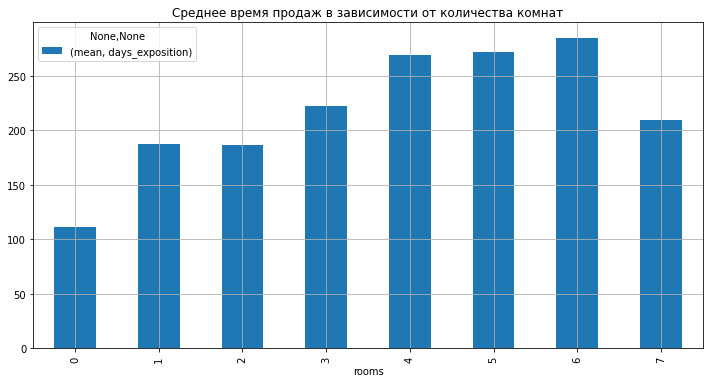

In [183]:
df_spb_center_exposition_by_rooms.plot(kind='bar',grid=True,figsize=(12,6), title='Среднее время продаж в зависимости от количества комнат')

В центре города в среднем быстрее продаются студии: за 3 месяца. Однушки и двушки продаются чуть медленнее, чем в среднем по городу чуть больше, чем за полгода.

In [184]:
df_spb_center_exposition_by_ceiling_height = pd.pivot_table(df_spb_center, 
               values='days_exposition', 
               index=['ceiling_height'],               
               aggfunc=['mean', 'count'])
df_spb_center_exposition_by_ceiling_height = df_spb_center_exposition_by_ceiling_height[df_spb_center_exposition_by_ceiling_height[('count', 'days_exposition')] > 10]
df_spb_center_exposition_by_ceiling_height = df_spb_center_exposition_by_ceiling_height.drop(('count', 'days_exposition'), 1)
df_spb_center_exposition_by_ceiling_height.sort_values(by=('mean', 'days_exposition')).head(10)


,mean
,days_exposition
ceiling_height,
2.55,101.500000
2.95,133.411765
2.50,137.340580
2.60,165.272727
2.75,176.487179
2.80,193.551181
3.80,196.714286
3.70,198.608696


<AxesSubplot:xlabel='ceiling_height'>

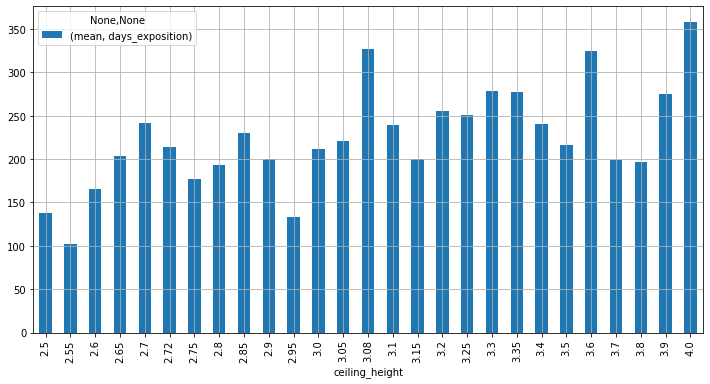

In [185]:
df_spb_center_exposition_by_ceiling_height.plot(kind='bar',grid=True,figsize=(12,6))

Наблюдается некоторая тенденция к увеличению срока продажи с ростом высоты потолка 

## Шаг 5. Общий вывод

***Общая и жилая площадь***

Мы увидили *прямую зависимость* стоимости квартиры от её общей площади, и количества комнат. 
Жилая площадь на стоимость *не влияет*.

Основная часть квартир продавалась по цене около 4 млн, и единицы - более 20 млн.

Основную массу продаж составляют 1-, 2- и чуть меньше 3-комнатные квартиры. В центре больше продают 2 и 3-комнатные квартиры

***Сроки продаж***

Самые быстрые и частые продажи начинаются уже с 3-го дня размещения, затем частота медленно падает, четверь продаж происходит за полтора месяца и половина продаж - за первые 3 месяца. Заметно быстро продаются *студии* (за 3 месяца), *однушки и двушки* - в среднем за 5-6 месяцев.

Мы заметили интересные всплески продаж на 7-й, 30, 45, 60 и 90 день публикации. Возможно, происходит какая-то массовая автоматизированная обработка объявлений.

***Топ 10 по стоимости квадратного метра***

По стоимости квадратного метра лидирует Питер, Пушкин и деревня Кудрово и замыкает десятку Выборг, там можно найти жильё подешевле.


***Влияние этажа***

*Квартиры на первом этаже* в среднем на 20% дешевле, а в центре - в два раза дешевле. В некоторых районах и в центре *квартиры на последнем этаже* имеют большую цену. Чем дальше от центра, тем квартира под крышей ценится меньше. Последние этажи ценятся в центре, особенно в многокомнатных квартирах. На расстоянии 3 км от центра города, можно найти наиболее дешёвые квартиры для центральной части города.

Самые высокие цены в 6-, 7-, 8-этажных домах, а в центре - в 8- и 25-этажных.

***Будни и выходные***

Количество объявлений естественным образом падает в выходные. Но, при этом, средняя стоимость квартир не имеет явных зависимостей от дня недели.

***Календарь продаж***

Если рассматривать зависимости по месяцам, то можно отметить, что в центре ***самые дорогие квартиры выставляются в декабре***, возможно с расчётом на покупателей с большими новогодними бонусами.

Осенью 2017 наблюдались 3 необычных пика по количеству продаж, превышающие более чем в 2 раза средний уровень.

Самые высокие цены на жильё были в 2014, к 2016 они упали и лишь после 2018 снова начался подъём цен.